11. Create data files having name, age, DoJ, DoR, emp code,salary in
json,xml,xls.Merge all those files as a single file into an xls file.

In [3]:
install.packages("jsonlite")
install.packages("xlsx")
install.packages("XML")
#A) How will you merge these two tables to create a single table
library(XML)
library(xlsx)
library(jsonlite)
getwd()
# Read data from JSON files
#data <- read_json("employee1.json")
#print(data)
df1 <- fromJSON("employee1.json")
df2 <- fromJSON("employee2.json")
# Print the data frame
xml_fileF<- "employee1.xml"
xml_fileS<- "employee2.xml"
docF <- xmlParse(xml_fileF)
docS <- xmlParse(xml_fileS)
# Read data from XML files
df3 <- xmlToDataFrame(docF)
df4 <- xmlToDataFrame(docS)
#print(data_xmlF)
#print(data_xmlS)
# Read data from Excel files
#library(xlsx)
df5 <- read.xlsx("employees1.xlsx", sheetName = "Sheet1")
df6 <- read.xlsx("employees2.xlsx", sheetName = "Sheet1")
print(df1)
print(df2)
print(df3)
print(df4)
print(df5)
print(df6)
# Concatenate data frames using rbind
merged_data <- rbind(df1, df2, df3,df4, df5, df6)
print(merged_data)
# Merge data from all sources into a single data frame
#merged_data <- rbind(data_jsonF, data_jsonS, data_xmlF, data_xmlS,
#data_excelF, data_excelS)
print(merged_data)
# Save the merged data to a new Excel file
write.xlsx(merged_data, "merged_employees00.xlsx", sheetName =
"Sheet1", row.names = FALSE)

Warning message:
"package 'jsonlite' is in use and will not be installed"


Warning message:
"package 'xlsx' is in use and will not be installed"
Warning message:
"package 'XML' is in use and will not be installed"


[1] "e:/GitHub/MCA/DataScience_R_Lab/Lab/Lab Submit"

  EmployeeName Age Salary Department        Doj        DoR
1  Json1Swetha  26   4900    Finance 2023-08-01 2025-08-01
2       Mahesh  28   5000         HR 2023-08-01 2025-08-01
3         Hari  25   4800         IT 2023-08-01 2025-08-01
4         Ammu  29   5200      Sales 2023-08-01 2025-08-01
5         Mani  31   5500  Marketing 2023-08-01 2025-08-01
  EmployeeName Age Salary Department        Doj        DoR
1  Json2Swetha  26   4000    Finance 2023-08-01 2025-08-01
2       Mahesh  28   4200         HR 2023-08-01 2025-08-01
3         Hari  25   4800         IT 2023-08-01 2025-08-01
4         Ammu  29   5200      Sales 2023-08-01 2025-08-01
5         Mani  31   5500  Marketing 2023-08-01 2025-08-01
  EmployeeName Age Salary Department        Doj        DoR
1   XML1Swetha  26  49000    Finance 2023-08-01 2025-08-01
2       Mahesh  28  50000         HR 2023-08-01 2025-08-01
3         Hari  25  48000         IT 2023-08-01 2025-08-01
4         Ammu  29  52000      Sales 2023-08-01 2025-08-

In [4]:
#B) Print those who are receiving salary greater than 5000
high_salary_employees <- merged_data[merged_data$Salary > 5000, ]
print(high_salary_employees)

   EmployeeName Age Salary Department        Doj        DoR
4          Ammu  29   5200      Sales 2023-08-01 2025-08-01
5          Mani  31   5500  Marketing 2023-08-01 2025-08-01
9          Ammu  29   5200      Sales 2023-08-01 2025-08-01
10         Mani  31   5500  Marketing 2023-08-01 2025-08-01
12       Mahesh  28  50000         HR 2023-08-01 2025-08-01
14         Ammu  29  52000      Sales 2023-08-01 2025-08-01
15         Mani  31  55000  Marketing 2023-08-01 2025-08-01
19         Ammu  29   5200      Sales 2023-08-01 2025-08-01
20         Mani  31   5500  Marketing 2023-08-01 2025-08-01
22       Mahesh  28  50000         HR      19571      21571
24         Ammu  29  52000      Sales      19573      21573
25         Mani  31  55000  Marketing      19574      21574
29         Ammu  29   5200      Sales      19573      21573
30         Mani  31   5500  Marketing      19574      21574


In [6]:
#C) Print those who are receiving salary in between 1000 and 10000
medium_salary_employees <- merged_data[merged_data$Salary >=1000 & merged_data$Salary <= 10000]
print(medium_salary_employees)

data frame with 0 columns and 30 rows


In [7]:

#D) Print those employees whose age is greater than 50
older_employees <- merged_data[merged_data$Age > 30, ]
print(older_employees)

   EmployeeName Age Salary Department        Doj        DoR
5          Mani  31   5500  Marketing 2023-08-01 2025-08-01
10         Mani  31   5500  Marketing 2023-08-01 2025-08-01
15         Mani  31  55000  Marketing 2023-08-01 2025-08-01
20         Mani  31   5500  Marketing 2023-08-01 2025-08-01
25         Mani  31  55000  Marketing      19574      21574
30         Mani  31   5500  Marketing      19574      21574


In [14]:
#E) Print those employees who have joined the company in less than one year
# Convert Date of Joining (Doj) and Date of Resignation (DoR) to Date
#objects
merged_data$Doj <- as.Date(merged_data$Doj, format="%Y-%m-%d")
merged_data$DoR <- as.Date(merged_data$DoR,
format="%Y-%m-%d")
#print(merged_data$Doj)
# Calculate the duration of employment in days
merged_data$employment_duration <-
as.numeric(difftime(merged_data$DoR, merged_data$Doj, units =
"days"))
# Filter employees who have worked for less than one year (365 days)
less_than_one_year_employees <-merged_data[merged_data$employment_duration < 365, ]
print(less_than_one_year_employees)

     EmployeeName  Age Salary Department  Doj  DoR employment_duration
NA           <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.1         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.2         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.3         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.4         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.5         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.6         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.7         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.8         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA
NA.9         <NA> <NA>   <NA>       <NA> <NA> <NA>                  NA


12. Mean, Median, Mode and Standard Deviation

In [15]:
#Mean
x <- c(12,7,3,4.2,18,2,54,-21,8,-5)
mean(x)
result.mean <- mean(x)
print(result.mean)
mean1<-mean(x,trim=0.1)
print(mean1)
x<-c(3,4.2,7,8)
mean(x)
x <- c(12,7,3,4.2,18,2,54,-21,8,-5)
result.mean <- mean(x,trim = 0.3)
print(result.mean)
#Median
x<-c(-21,-5,2,3,4.2,7.89876,8,12,18,54,78)
median.result <- median(x)
print(median.result)
t=median(x)/3
median.result<-median(t,trim=0.3)
print(median.result)
#Mode
getmode <- function(v) {
uniqv <- unique(v)
print(unique(v))
print(tabulate(match(v, uniqv)))
uniqv[which.max(tabulate(match(v, uniqv)))]
}
v <- c(2,1,2,3,1,2,3,4,1,5,5,3,2,3)
unique(v)
tabulate(match(v,unique(v)))
result <- getmode(v)
print(result)
charv <- c("o","it","the","it","it")
print(charv)
print(unique(charv))
print(tabulate(match(charv, unique(charv))))
result <- getmode(charv)
print(result)
#Standard Deviation
v <- c(2,1,2,3,1,2,3,4,1,5,5,3,2,3)
standard_deviation <- sd(v)
print(paste("Standard Deviation: ", standard_deviation))

[1] 8.22

[1] 8.22
[1] 6.15


[1] 5.55

[1] 5.55
[1] 7.89876
[1] 2.63292


[1] 2 1 3 4 5

[1] 4 3 4 1 2

[1] 2 1 3 4 5
[1] 4 3 4 1 2
[1] 2
[1] "o"   "it"  "the" "it"  "it" 
[1] "o"   "it"  "the"
[1] 1 3 1
[1] "o"   "it"  "the"
[1] 1 3 1
[1] "it"
[1] "Standard Deviation:  1.33630620956212"


13. Input XLS file and find the Mean, Median, and Mode

In [17]:
install.packages("xlsx")
library(xlsx)
excel_file <- "input.xlsx"
data <- read.xlsx(excel_file, sheetIndex = 1)
print(data)
column_name <- "salary"
column_mean <- mean(data[[column_name]], na.rm = TRUE)
cat("Mean of", column_name, "is:", column_mean, "\n")
column_median <- median(data[[column_name]], na.rm = TRUE)
cat("Median of", column_name, "is:", column_median, "\n")
column_mode <- as.numeric(names(sort(table(data[[column_name]]),
decreasing = TRUE)[1]))
cat("Mode of", column_name, "is:", column_mode, "\n")

Warning message:
"package 'xlsx' is in use and will not be installed"


ERROR: Error in .jcall("RJavaTools", "Ljava/lang/Object;", "invokeMethod", cl, : java.lang.IllegalArgumentException: Your InputStream was neither an OLE2 stream, nor an OOXML stream


14. Correlation without using builtin function

In [18]:
x <- c(10, 12, 14)
y <- c(11, 13, 24)
n <- length(x)
sumx <- sum(x)
sumy <- sum(y)
sumxy <- sum(x * y)
sumxx <- sum(x*x)
sumyy <- sum(y*y)
r <- (n * sumxy - sumx * sumy) / sqrt((n * sumxx - sumx * sumx) * (n *
sumyy - sumy * sumy))
print(paste("Mathematical method Correlation coefficient (r):", r))

[1] "Mathematical method Correlation coefficient (r): 0.928571428571429"


15.Linear Regression using dataset


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
 -1.589e-15    2.000e+00  



Warning message in summary.lm(relation):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = y ~ x)

Residuals:
         1          2          3          4          5 
 4.367e-16 -8.276e-16  3.028e-16  1.303e-16 -4.222e-17 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -1.589e-15  6.013e-16 -2.642e+00   0.0775 .  
x            2.000e+00  1.813e-16  1.103e+16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.733e-16 on 3 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.217e+32 on 1 and 3 DF,  p-value: < 2.2e-16



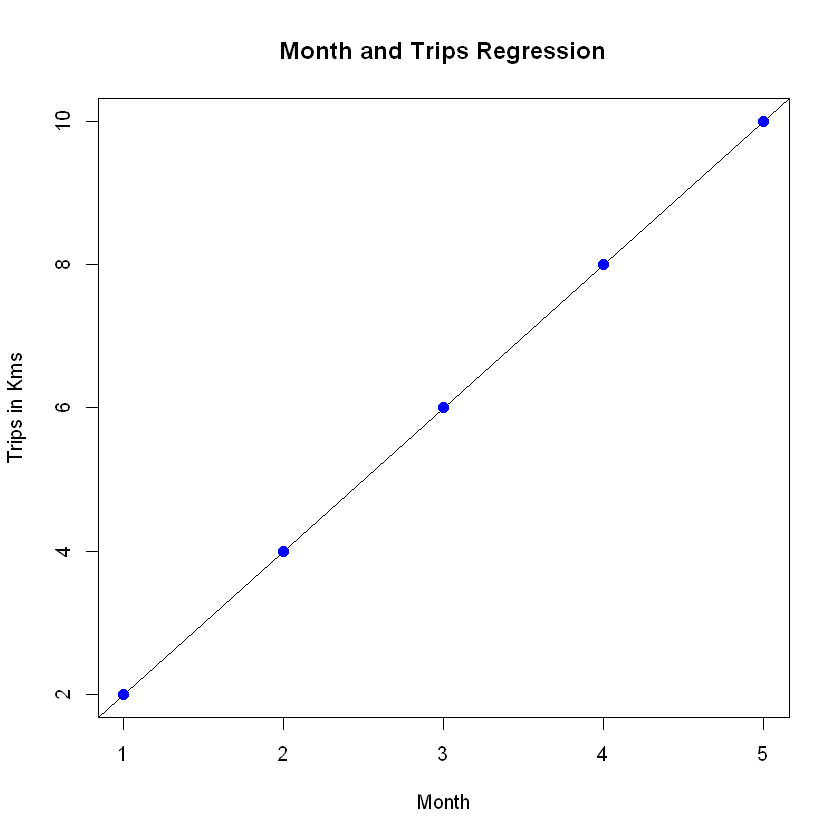

In [20]:
# Apply the lm() function.
x<-c(1,2,3,4,5)
y<-c(2,4,6,8,10)
#Create Relationship Model & get the Coefficients
relation <- lm(y~x)
print(relation)
print(summary(relation))
plot(x,y,col = "blue",main = "Month and Trips Regression",abline(lm(y~x)),cex = 1.9,pch = 20,xlab = "Month",ylab = "Trips in Kms")

 1 
60 

Call:
lm(formula = x ~ y)

Coefficients:
(Intercept)            y  
 -7.944e-16    5.000e-01  



Warning message in summary.lm(relation):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = x ~ y)

Residuals:
         1          2          3          4          5 
 2.184e-16 -4.138e-16  1.514e-16  6.514e-17 -2.111e-17 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -7.944e-16  3.007e-16 -2.642e+00   0.0775 .  
y            5.000e-01  4.532e-17  1.103e+16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.867e-16 on 3 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.217e+32 on 1 and 3 DF,  p-value: < 2.2e-16



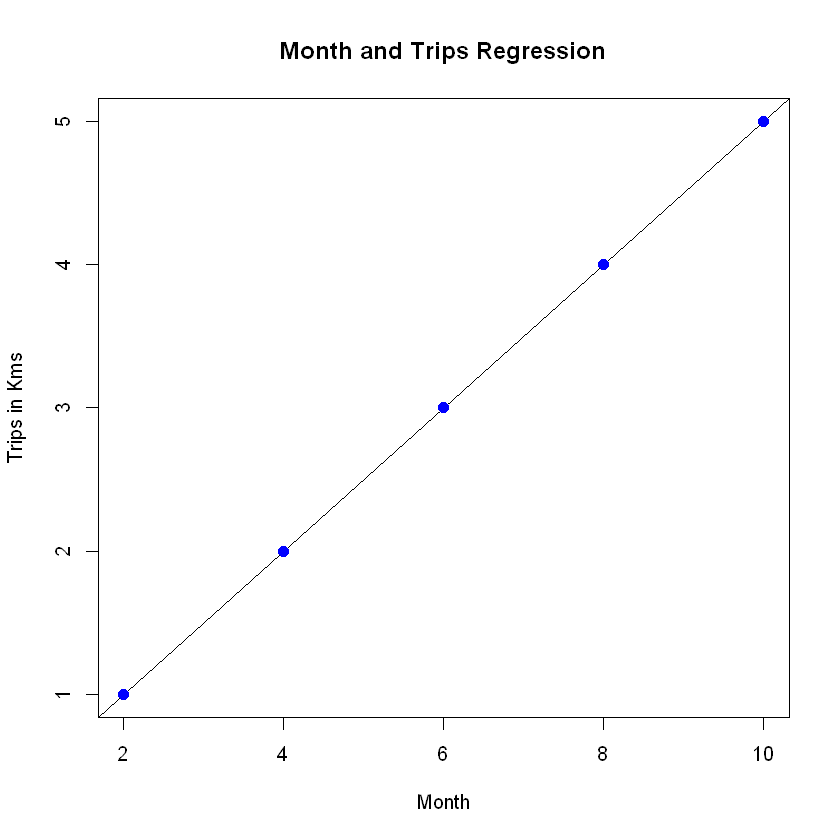

In [21]:
a <- data.frame(x =30)
result <- predict(relation,a)
print(result)
relation<-lm(x~y)
print(relation)
print(summary(relation))
plot(y,x,col = "blue",main = "Month and Trips Regression",
abline(lm(x~y)),cex = 1.9,pch = 20,xlab = "Month",ylab = "Trips in Kms")


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   -38.4551       0.6746  



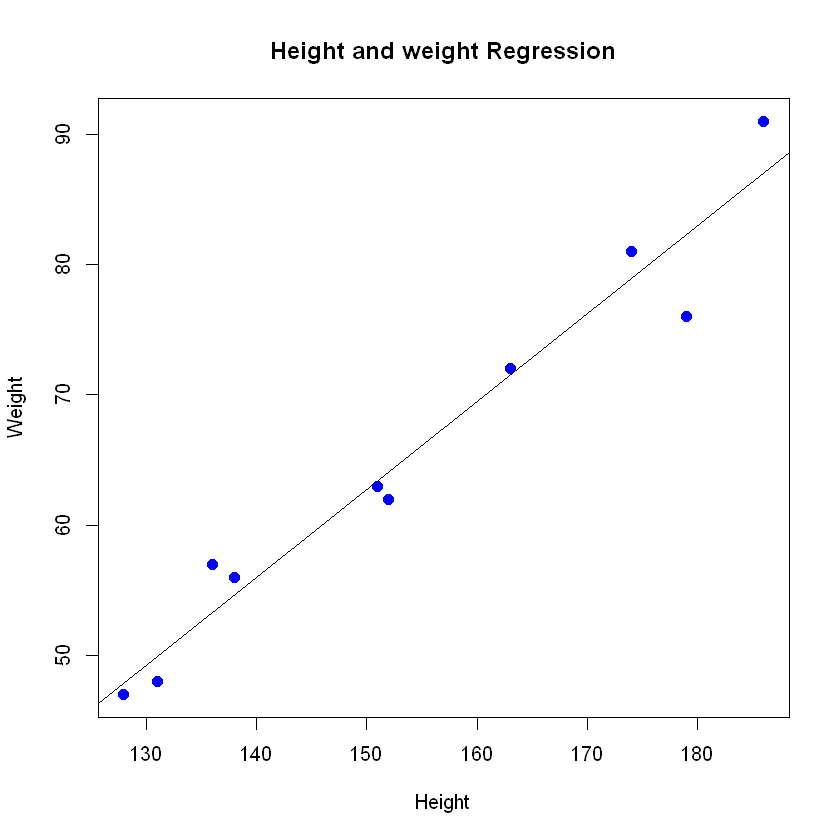

In [22]:

x <- c(151, 174, 138, 186, 128, 136, 179, 163, 152, 131)
y <- c(63, 81, 56, 91, 47, 57, 76, 72, 62, 48)
# Apply the lm() function.
relation <- lm(y~x)
print(relation)
plot(x,y,col = "blue",main = "Height and weight Regression",
abline(lm(y~x)),cex = 1.9,pch = 20,xlab = "Height",ylab = "Weight")

       1 
76.22869 


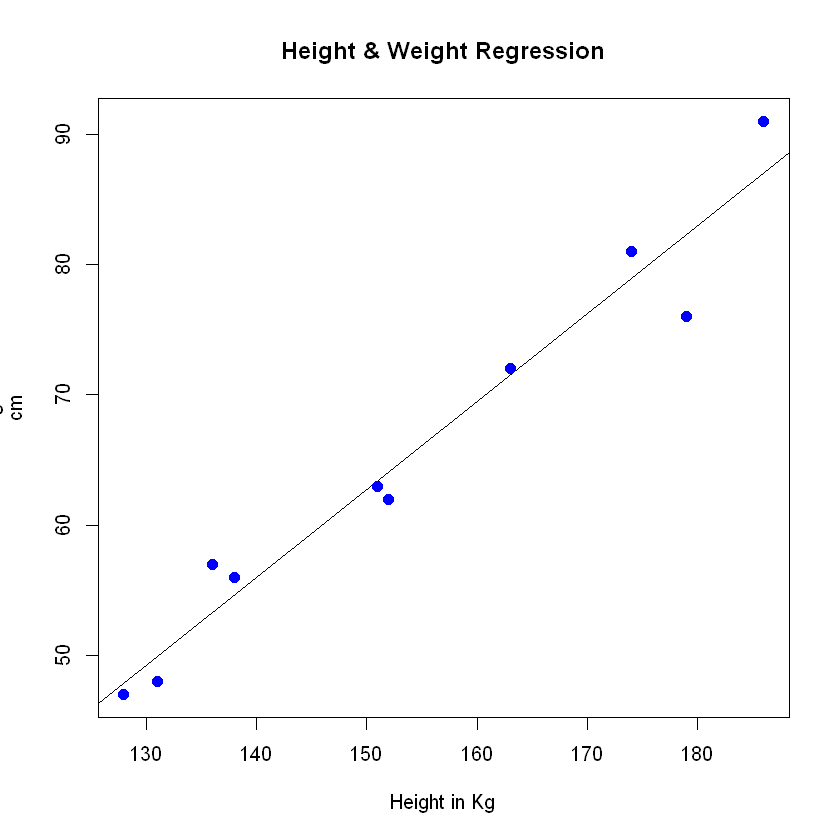

In [23]:

a <- data.frame(x = 170)
result <- predict(relation,a)
print(result)
x <- c(151, 174, 138, 186, 128, 136, 179, 163, 152, 131)
y <- c(63, 81, 56, 91, 47, 57, 76, 72, 62, 48)
relation <- lm(y~x)
# Plot the chart.
plot(x,y,col = "blue",main = "Height & Weight Regression",
abline(lm(y~x)),cex = 1.9,pch = 20,xlab = "Height in Kg",ylab = "Weight in
cm")


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    1.76553      0.09295  



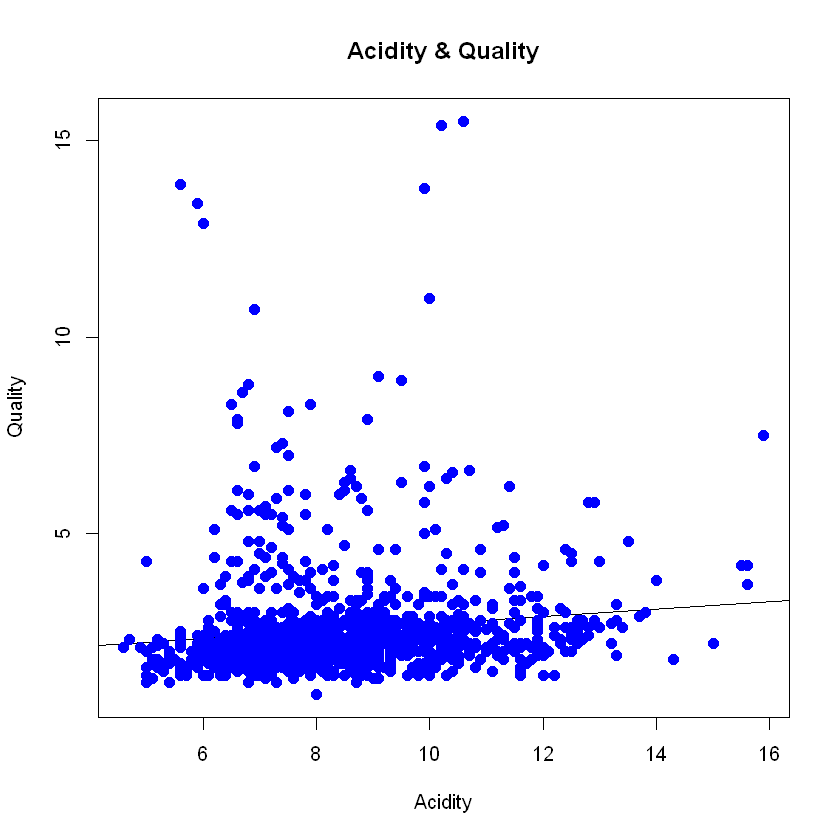

In [24]:

#read data from csv files
#setwd("e:/MCA/Unit iv")
data=read.csv("winequality-red.csv")
x<-data$fixed.acidity
y<-data$residual.sugar
relation <- lm(y~x)
print(relation)
plot(x,y,col = "blue",main = "Acidity & Quality",
abline(lm(y~x)),cex = 1.9,pch = 20,xlab = "Acidity",ylab = "Quality")

16.Multiple Linear Regression using dataset

In [25]:
mtcars
print(mtcars)
input <- mtcars[,c("mpg","disp","hp","wt")]
print(head(input))
input <- mtcars[,c("mpg","disp","hp","wt")]
model <- lm(mpg~disp+hp+wt, data = input)
print(summary(model))
a <- coef(model)[1]
print(a)
Xdisp <- coef(model)[2]
Xhp <- coef(model)[3]
Xwt <- coef(model)[4]
print(Xdisp)
print(Xhp)
print(Xwt)
print(summary(model))
paste("y=",a,"+",Xdisp,"*x1","+",Xhp,"*x2","+",Xwt,"*x3")
#Y = 37.15+(-0.000937)*221+(-0.0311)*102+(-3.8008)*2.91 = 22.7104
disp=221
hp=102
wt=2.91
#print(37.10-0.0009*221-0.0311*102-3.8008*2.91)
a1 <- data.frame(disp,hp,wt)
result <- predict(model,a1)
print(result)
x1<-c(2,3,4,5)
x2<-c(4,5,1,5)
x3<-c(3,4,7,5)
y<-c(2,7,5,4)
input<-list(c(y),c(x1),c(x2),c(x3))
print(input)
model<-lm(y~x1+x2+x3,data=input)
print(summary(model))
a <- coef(model)[1]
print(a)
x1 <- coef(model)[2]
x2 <- coef(model)[3]
x3 <- coef(model)[4]
paste("y=",a,"+",x1,"*x1","+",x2,"*x2","+",x3,"*x3")
a1 <- data.frame(x1 = 2,x2=4,x3=4)
result <- predict(model,a1)
print(result)
#setwd("e:/MCA/Unit iv")
data=read.csv("winequality-red.csv")
x1<-data$fixed.acidity
x2<-data$volatile.acidity
x3<-data$citric.acid
x4<-data$residual.sugar
x5<-data$free.sulfur.dioxide
x6<-data$total.sulfur.dioxide
x7<-data$density
x8<-data$pH
x9<-data$sulphates
x10<-data$chlorides
x11=data$alcohol
y<-data$quality
model=lm(y~x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11)
print(summary(model))
paste("y=",a,"+",x1,"*x1","+",x2,"*x2","+",x3,"*x3", "+",x4,"*x4")
#6.3 0.51 0.13 2.3 0.076 29 40 0.99574 3.42 0.75 11
a1 <- data.frame (x1=6.3, x2=0.51, x3=0.13, x4=2.3, x10=0.076, x5=29,
x6=40, x7=0.99574, x8=3.42, x9=0.75, x11=11)
result <- predict(model,a1)
print(result)
input <- data [, c("fixed.acidity", "volatile.acidity", "citric.acid",
"residual.sugar", "quality")]
model <- lm (quality~fixed.acidity + volatile.acidity + citric.acid +
residual.sugar, data = input)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3
Merc 450SL          17.3   8 275.8 180 3.07 3.730 17.60  0  0   

[1] "y= 37.1055052690318 + -0.000937009081489664 *x1 + -0.0311565508299455 *x2 + -3.80089058263761 *x3"

       1 
22.65987 
[[1]]
[1] 2 7 5 4

[[2]]
[1] 2 3 4 5

[[3]]
[1] 4 5 1 5

[[4]]
[1] 3 4 7 5


Call:
lm(formula = y ~ x1 + x2 + x3, data = input)

Residuals:
ALL 4 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -21.000        NaN     NaN      NaN
x1            -4.333        NaN     NaN      NaN
x2             3.667        NaN     NaN      NaN
x3             5.667        NaN     NaN      NaN

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 3 and 0 DF,  p-value: NA

(Intercept) 
        -21 


[1] "y= -21 + -4.33333333333334 *x1 + 3.66666666666667 *x2 + 5.66666666666667 *x3"

       1 
7.666667 

Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + 
    x10 + x11)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68911 -0.36652 -0.04699  0.45202  2.02498 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.197e+01  2.119e+01   1.036   0.3002    
x1           2.499e-02  2.595e-02   0.963   0.3357    
x2          -1.084e+00  1.211e-01  -8.948  < 2e-16 ***
x3          -1.826e-01  1.472e-01  -1.240   0.2150    
x4           1.633e-02  1.500e-02   1.089   0.2765    
x5           4.361e-03  2.171e-03   2.009   0.0447 *  
x6          -3.265e-03  7.287e-04  -4.480 8.00e-06 ***
x7          -1.788e+01  2.163e+01  -0.827   0.4086    
x8          -4.137e-01  1.916e-01  -2.159   0.0310 *  
x9           9.163e-01  1.143e-01   8.014 2.13e-15 ***
x10         -1.874e+00  4.193e-01  -4.470 8.37e-06 ***
x11          2.762e-01  2.648e-02  10.429  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

[1] "y= -21 + 7.4 *x1 + 0.7 *x2 + 0 *x3 + 1.9 *x4"      
   [2] "y= -21 + 7.8 *x1 + 0.88 *x2 + 0 *x3 + 2.6 *x4"     
   [3] "y= -21 + 7.8 *x1 + 0.76 *x2 + 0.04 *x3 + 2.3 *x4"  
   [4] "y= -21 + 11.2 *x1 + 0.28 *x2 + 0.56 *x3 + 1.9 *x4" 
   [5] "y= -21 + 7.4 *x1 + 0.7 *x2 + 0 *x3 + 1.9 *x4"      
   [6] "y= -21 + 7.4 *x1 + 0.66 *x2 + 0 *x3 + 1.8 *x4"     
   [7] "y= -21 + 7.9 *x1 + 0.6 *x2 + 0.06 *x3 + 1.6 *x4"   
   [8] "y= -21 + 7.3 *x1 + 0.65 *x2 + 0 *x3 + 1.2 *x4"     
   [9] "y= -21 + 7.8 *x1 + 0.58 *x2 + 0.02 *x3 + 2 *x4"    
  [10] "y= -21 + 7.5 *x1 + 0.5 *x2 + 0.36 *x3 + 6.1 *x4"   
  [11] "y= -21 + 6.7 *x1 + 0.58 *x2 + 0.08 *x3 + 1.8 *x4"  
  [12] "y= -21 + 7.5 *x1 + 0.5 *x2 + 0.36 *x3 + 6.1 *x4"   
  [13] "y= -21 + 5.6 *x1 + 0.615 *x2 + 0 *x3 + 1.6 *x4"    
  [14] "y= -21 + 7.8 *x1 + 0.61 *x2 + 0.29 *x3 + 1.6 *x4"  
  [15] "y= -21 + 8.9 *x1 + 0.62 *x2 + 0.18 *x3 + 3.8 *x4"  
  [16] "y= -21 + 8.9 *x1 + 0.62 *x2 + 0.19 *x3 + 3.9 *x4"  
  [17] "y= -21 + 8.5 *x1 + 0.28 *x2 + 0.56 *x3 + 1.8 *x4"  
  [18] "y= -21 + 8.1 *x1 + 0.56 *x2 + 0.28 *x3 + 1.7 *x4"  
  [19] "y= -21 + 7.4 *x1 + 0.59 *x2 + 0.08 *x3 + 4.4 *x4"  
  [20] "y= -21 + 7.9 *x1 + 0.32 *x2 + 0.51 *x3 + 1.8 *x4"  
  [21] "y= -21 + 8.9 *x1 + 0.22 *x2 + 0.48 *x3 + 1.8 *x4"  
  [22] "y= -21 + 7.6 *x1 + 0.39 *x2 + 0.31 *x3 + 2.3 *x4"  
  [23] "y= -21 + 7.9 *x1 + 0.43 *x2 + 0.21 *x3 + 1.6 *x4"  
  [24] "y= -21 + 8.5 *x1 + 0.49 *x2 + 0.11 *x3 + 2.3 *x4"  
  [25] "y= -21 + 6.9 *x1 + 0.4 *x2 + 0.14 *x3 + 2.4 *x4"   
  [26] "y= -21 + 6.3 *x1 + 0.39 *x2 + 0.16 *x3 + 1.4 *x4"  
  [27] "y= -21 + 7.6 *x1 + 0.41 *x2 + 0.24 *x3 + 1.8 *x4"  
  [28] "y= -21 + 7.9 *x1 + 0.43 *x2 + 0.21 *x3 + 1.6 *x4"  
  [29] "y= -21 + 7.1 *x1 + 0.71 *x2 + 0 *x3 + 1.9 *x4"     
  [30] "y= -21 + 7.8 *x1 + 0.645 *x2 + 0 *x3 + 2 *x4"      
  [31] "y= -21 + 6.7 *x1 + 0.675 *x2 + 0.07 *x3 + 2.4 *x4" 
  [32] "y= -21 + 6.9 *x1 + 0.685 *x2 + 0 *x3 + 2.5 *x4"    
  [33] "y= -21 + 8.3 *x1 + 0.655 *x2 + 0.12 *x3 + 2.3 *x4" 
  [34] "y= -21 + 6.9 *x1 + 0.605 *x2 + 0.12 *x3 + 10.7 *x4"
  [35] "y= -21 + 5.2 *x1 + 0.32 *x2 + 0.25 *x3 + 1.8 *x4"  
  [36] "y= -21 + 7.8 *x1 + 0.645 *x2 + 0 *x3 + 5.5 *x4"    
  [37] "y= -21 + 7.8 *x1 + 0.6 *x2 + 0.14 *x3 + 2.4 *x4"   
  [38] "y= -21 + 8.1 *x1 + 0.38 *x2 + 0.28 *x3 + 2.1 *x4"  
  [39] "y= -21 + 5.7 *x1 + 1.13 *x2 + 0.09 *x3 + 1.5 *x4"  
  [40] "y= -21 + 7.3 *x1 + 0.45 *x2 + 0.36 *x3 + 5.9 *x4"  
  [41] "y= -21 + 7.3 *x1 + 0.45 *x2 + 0.36 *x3 + 5.9 *x4"  
  [42] "y= -21 + 8.8 *x1 + 0.61 *x2 + 0.3 *x3 + 2.8 *x4"   
  [43] "y= -21 + 7.5 *x1 + 0.49 *x2 + 0.2 *x3 + 2.6 *x4"   
  [44] "y= -21 + 8.1 *x1 + 0.66 *x2 + 0.22 *x3 + 2.2 *x4"  
  [45] "y= -21 + 6.8 *x1 + 0.67 *x2 + 0.02 *x3 + 1.8 *x4"  
  [46] "y= -21 + 4.6 *x1 + 0.52 *x2 + 0.15 *x3 + 2.1 *x4"  
  [47] "y= -21 + 7.7 *x1 + 0.935 *x2 + 0.43 *x3 + 2.2 *x4" 
  [48] "y= -21 + 8.7 *x1 + 0.29 *x2 + 0.52 *x3 + 1.6 *x4"  
  [49] "y= -21 + 6.4 *x1 + 0.4 *x2 + 0.23 *x3 + 1.6 *x4"   
  [50] "y= -21 + 5.6 *x1 + 0.31 *x2 + 0.37 *x3 + 1.4 *x4"  
  [51] "y= -21 + 8.8 *x1 + 0.66 *x2 + 0.26 *x3 + 1.7 *x4"  
  [52] "y= -21 + 6.6 *x1 + 0.52 *x2 + 0.04 *x3 + 2.2 *x4"  
  [53] "y= -21 + 6.6 *x1 + 0.5 *x2 + 0.04 *x3 + 2.1 *x4"   
  [54] "y= -21 + 8.6 *x1 + 0.38 *x2 + 0.36 *x3 + 3 *x4"    
  [55] "y= -21 + 7.6 *x1 + 0.51 *x2 + 0.15 *x3 + 2.8 *x4"  
  [56] "y= -21 + 7.7 *x1 + 0.62 *x2 + 0.04 *x3 + 3.8 *x4"  
  [57] "y= -21 + 10.2 *x1 + 0.42 *x2 + 0.57 *x3 + 3.4 *x4" 
  [58] "y= -21 + 7.5 *x1 + 0.63 *x2 + 0.12 *x3 + 5.1 *x4"  
  [59] "y= -21 + 7.8 *x1 + 0.59 *x2 + 0.18 *x3 + 2.3 *x4"  
  [60] "y= -21 + 7.3 *x1 + 0.39 *x2 + 0.31 *x3 + 2.4 *x4"  
  [61] "y= -21 + 8.8 *x1 + 0.4 *x2 + 0.4 *x3 + 2.2 *x4"    
  [62] "y= -21 + 7.7 *x1 + 0.69 *x2 + 0.49 *x3 + 1.8 *x4"  
  [63] "y= -21 + 7.5 *x1 + 0.52 *x2 + 0.16 *x3 + 1.9 *x4"  
  [64] "y= -21 + 7 *x1 + 0.735 *x2 + 0.05 *x3 + 2 *x4"     
  [65] "y= -21 + 7.2 *x1 + 0.725 *x2 + 0.05 *x3 + 4.65 *x4"
  [66] "y= -21 + 7.2 *x1 + 0.725 *x2 + 0.05 *x3 + 4.65 *x4"
  [67] "y= -21 + 7.5 *x1 + 0.52 *x2 + 0.11 

       1 
5.943043 


17. Logistic Regression

In [26]:
mtcars
# Select some columns form mtcars.
input <- mtcars[,c("am","cyl","hp","wt")]
print(head(input))
input <- mtcars[,c("am","cyl","hp","wt")]
am.data = glm(formula = am ~ cyl + hp + wt, data = input, family =
binomial)
print(summary(am.data))

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


                  am cyl  hp    wt
Mazda RX4          1   6 110 2.620
Mazda RX4 Wag      1   6 110 2.875
Datsun 710         1   4  93 2.320
Hornet 4 Drive     0   6 110 3.215
Hornet Sportabout  0   8 175 3.440
Valiant            0   6 105 3.460

Call:
glm(formula = am ~ cyl + hp + wt, family = binomial, data = input)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 19.70288    8.11637   2.428   0.0152 *
cyl          0.48760    1.07162   0.455   0.6491  
hp           0.03259    0.01886   1.728   0.0840 .
wt          -9.14947    4.15332  -2.203   0.0276 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.2297  on 31  degrees of freedom
Residual deviance:  9.8415  on 28  degrees of freedom
AIC: 17.841

Number of Fisher Scoring iterations: 8



18.Poisson Regression

In [27]:
input <- warpbreaks
print(head(input))
output <-glm(formula = breaks ~ wool+tension, data = warpbreaks,
family = poisson)
print(summary(output))
output1 <-glm(formula = breaks ~ wool+tension, data = warpbreaks,
family = quasipoisson(link="log"))
print(summary(output1))
mtcars
input <- mtcars[,c("am","cyl","hp","wt")]
print(head(input))
input <- mtcars[,c("am","cyl","hp","wt")]
am.data = glm(formula = am ~ cyl + hp + wt, data = input, family = poisson)
print(summary(am.data))

  breaks wool tension
1     26    A       L
2     30    A       L
3     54    A       L
4     25    A       L
5     70    A       L
6     52    A       L

Call:
glm(formula = breaks ~ wool + tension, family = poisson, data = warpbreaks)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.69196    0.04541  81.302  < 2e-16 ***
woolB       -0.20599    0.05157  -3.994 6.49e-05 ***
tensionM    -0.32132    0.06027  -5.332 9.73e-08 ***
tensionH    -0.51849    0.06396  -8.107 5.21e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 210.39  on 50  degrees of freedom
AIC: 493.06

Number of Fisher Scoring iterations: 4


Call:
glm(formula = breaks ~ wool + tension, family = quasipoisson(link = "log"), 
    data = warpbreaks)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.69196    

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


                  am cyl  hp    wt
Mazda RX4          1   6 110 2.620
Mazda RX4 Wag      1   6 110 2.875
Datsun 710         1   4  93 2.320
Hornet 4 Drive     0   6 110 3.215
Hornet Sportabout  0   8 175 3.440
Valiant            0   6 105 3.460

Call:
glm(formula = am ~ cyl + hp + wt, family = poisson, data = input)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  2.529843   1.081631   2.339   0.0193 *
cyl         -0.205711   0.467090  -0.440   0.6596  
hp           0.011133   0.007435   1.497   0.1343  
wt          -1.365985   0.674785  -2.024   0.0429 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 23.420  on 31  degrees of freedom
Residual deviance: 10.288  on 28  degrees of freedom
AIC: 44.288

Number of Fisher Scoring iterations: 5



19. Non-Linear regression

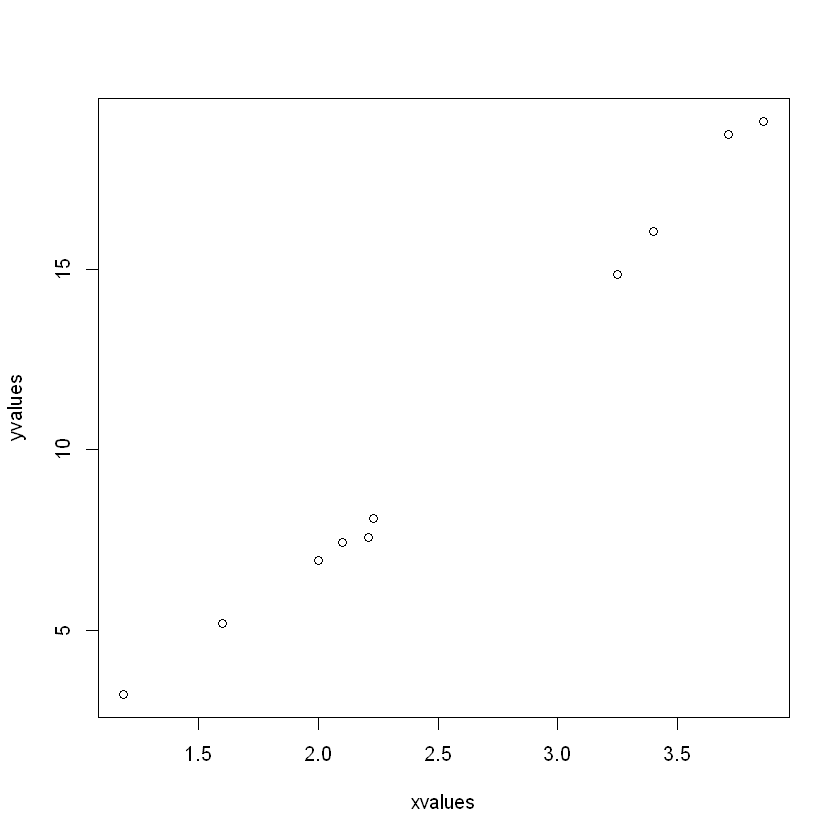


Formula: yvalues ~ b1 * xvalues^2 + b2

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
b1  1.19542    0.02503  47.764 4.08e-11 ***
b2  1.99692    0.21663   9.218 1.55e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3678 on 8 degrees of freedom

Number of iterations to convergence: 1 
Achieved convergence tolerance: 5.108e-07

     xvalues
1   1.190000
2   1.216970
3   1.243939
4   1.270909
5   1.297879
6   1.324848
7   1.351818
8   1.378788
9   1.405758
10  1.432727
11  1.459697
12  1.486667
13  1.513636
14  1.540606
15  1.567576
16  1.594545
17  1.621515
18  1.648485
19  1.675455
20  1.702424
21  1.729394
22  1.756364
23  1.783333
24  1.810303
25  1.837273
26  1.864242
27  1.891212
28  1.918182
29  1.945152
30  1.972121
31  1.999091
32  2.026061
33  2.053030
34  2.080000
35  2.106970
36  2.133939
37  2.160909
38  2.187879
39  2.214848
40  2.241818
41  2.268788
42  2.295758
43  2.322727
44  2.349697
45  2.376667
46  2.403

Waiting for profiling to be done...



       2.5%    97.5%
b1 1.137708 1.253135
b2 1.497364 2.496484


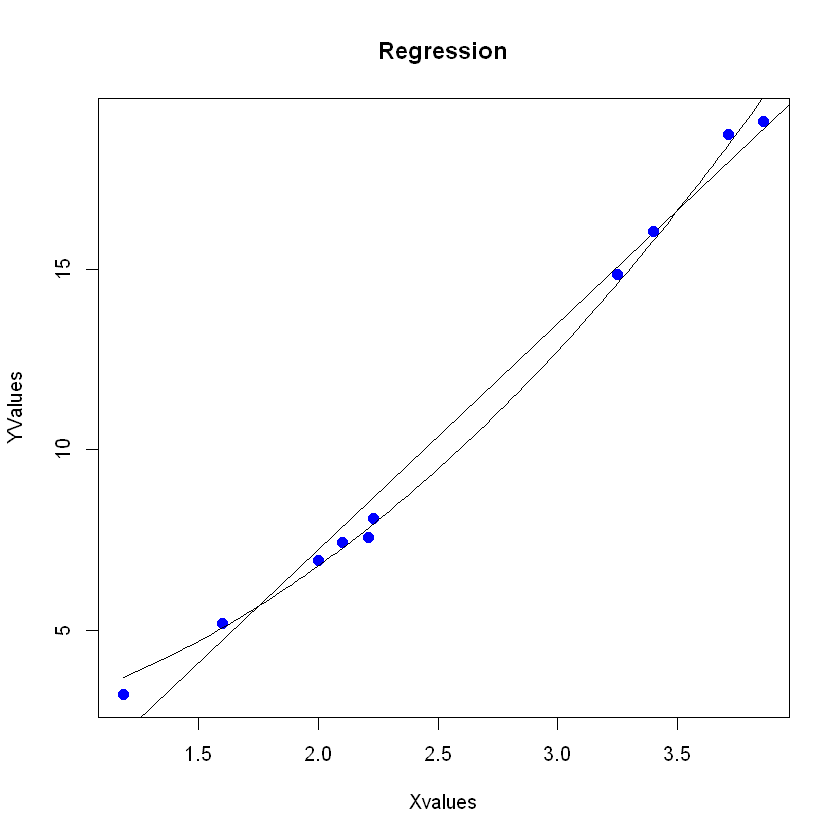

In [28]:
xvalues <- c(1.6,2.1,2,2.23,3.71,3.25,3.4,3.86,1.19,2.21)
yvalues <- c(5.19,7.43,6.94,8.11,18.75,14.88,16.06,19.12,3.21,7.58)
plot(xvalues,yvalues)
#linear Regression
plot(xvalues,yvalues,col = "blue",main = "Regression",
abline (lm (yvalues~xvalues)), cex = 1.9,pch = 20,xlab = "Xvalues",ylab
= "YValues")
model <- nls(yvalues ~ b1*xvalues^2+b2,start = list(b1 = 10,b2 = 10))
print(summary(model))
new.data <- data.frame(xvalues = seq(min(xvalues),max(xvalues), len =
100))
print(new.data)
lines(new.data$xvalues,predict(model,newdata = new.data))
print(sum(resid(model)^2))
print(confint(model))